In [1]:
#1.Data collection
import pandas as pd

In [2]:
dataset=pd.read_csv("traffic.csv")

In [3]:
dataset

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


In [4]:
#2.data preprocessing
dataset.isnull()

,DateTime,Junction,Vehicles,ID
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
48115,False,False,False,False
48116,False,False,False,False
48117,False,False,False,False
48118,False,False,False,False


In [5]:
dataset.isna().sum()

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64

In [6]:
#3.univariate & Bivariate analysis 
#1.when and where traffic congestion is most likely to occur?


import matplotlib.pyplot as plt
dataset['DateTime']=pd.to_datetime(dataset['DateTime'])

# Extract hour and day of week
dataset['Hour'] = dataset['DateTime'].dt.hour
dataset['DayOfWeek'] = dataset['DateTime'].dt.day_name()    #To extract parts like hour or day, use .dt accessor

# Group by Junction and Hour to find average vehicle count
hourly_congestion = dataset.groupby(['Junction', 'Hour'])['Vehicles'].mean().reset_index()


In [7]:
peak_hours = hourly_congestion.loc[hourly_congestion.groupby('Junction')['Vehicles'].idxmax()]
print("🚦 Peak Congestion Hours by Junction:")
print(peak_hours)

🚦 Peak Congestion Hours by Junction:
    Junction  Hour   Vehicles
19         1    19  58.804276
44         2    20  18.060855
68         3    20  20.200658
84         4    12  10.237569


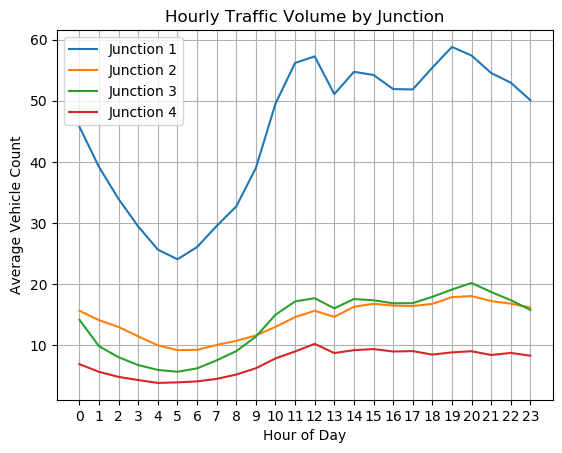

In [8]:
#Plot congestion patterns
for junc in sorted(dataset['Junction'].unique()):
    subset = hourly_congestion[hourly_congestion['Junction'] == junc]
    plt.plot(subset['Hour'], subset['Vehicles'], label=f'Junction {junc}')

plt.xlabel('Hour of Day')
plt.ylabel('Average Vehicle Count')
plt.title('Hourly Traffic Volume by Junction')
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

In [9]:
junction_congestion = dataset.groupby('Junction')['Vehicles'].mean().sort_values(ascending=False)

In [10]:
junction_congestion

Junction
1    45.052906
2    14.253221
3    13.694010
4     7.251611
Name: Vehicles, dtype: float64

Invalid DateTime entries:
Empty DataFrame
Columns: [DateTime, Junction, Vehicles, ID, Hour, DayOfWeek]
Index: []
📊 Average vehicle count per day of the week:
DayOfWeek
Monday       24.409408
Tuesday      25.286731
Wednesday    25.149681
Thursday     25.152875
Friday       23.802120
Saturday     18.544611
Sunday       17.134727
Name: Vehicles, dtype: float64


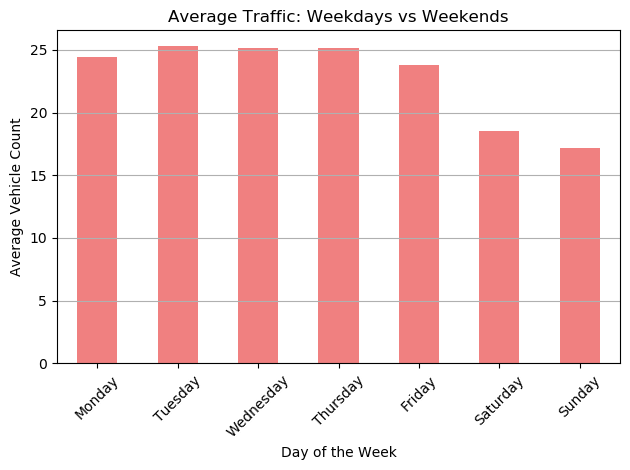

In [11]:
#2.Are weekends less congested than weekdays?

dataset['DateTime'] = pd.to_datetime(dataset['DateTime'], errors='coerce')



print("Invalid DateTime entries:")
print(dataset[dataset['DateTime'].isna()])

dataset['DayOfWeek'] = dataset['DateTime'].dt.day_name()

dataset =dataset.dropna(subset=['DateTime', 'DayOfWeek'])

day_avg = dataset.groupby('DayOfWeek')['Vehicles'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_avg = day_avg.reindex(day_order)

print("📊 Average vehicle count per day of the week:")
print(day_avg)

# Plot the results
day_avg.plot(kind='bar', color='lightcoral', title='Average Traffic: Weekdays vs Weekends')
plt.ylabel('Average Vehicle Count')
plt.xlabel('Day of the Week')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

🔍 Summary of vehicle counts:
count    48120.000000
mean        22.791334
std         20.750063
min          1.000000
25%          9.000000
50%         15.000000
75%         29.000000
max        180.000000
Name: Vehicles, dtype: float64

🚨 Records with 0 vehicles: 0
Empty DataFrame
Columns: [DateTime, Junction, Vehicles]
Index: []

🚨 Records with implausibly high vehicle counts (>100): 315
                 DateTime  Junction  Vehicles
8491  2016-10-19 19:00:00         1       106
8651  2016-10-26 11:00:00         1       106
9540  2016-12-02 12:00:00         1       120
10452 2017-01-09 12:00:00         1       104
10620 2017-01-16 12:00:00         1       120


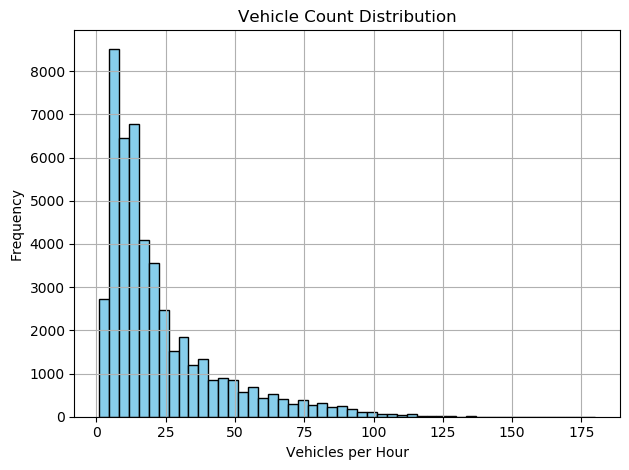

In [12]:
#3.Are there any timestamps where vehicle counts are suspiciously low (0) or implausibly high?


# Check vehicle count range
print("🔍 Summary of vehicle counts:")
print(dataset['Vehicles'].describe())

# Find records with 0 vehicles
zero_vehicles = dataset[dataset['Vehicles'] == 0]
print(f"\n🚨 Records with 0 vehicles: {len(zero_vehicles)}")
print(zero_vehicles[['DateTime', 'Junction', 'Vehicles']].head())

# Find records with extremely high vehicle counts (e.g., >100)
high_vehicles = dataset[dataset['Vehicles'] > 100]
print(f"\n🚨 Records with implausibly high vehicle counts (>100): {len(high_vehicles)}")
print(high_vehicles[['DateTime', 'Junction', 'Vehicles']].head())

# Optional: plot vehicle count distribution
import matplotlib.pyplot as plt

plt.hist(dataset['Vehicles'], bins=50, color='skyblue', edgecolor='black')
plt.title("Vehicle Count Distribution")
plt.xlabel("Vehicles per Hour")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


📆 Average vehicle count by month:
MonthName
January      19.727343
February     22.962312
March        23.073349
April        24.454365
May          24.633449
June         26.032143
July         21.837814
August       21.936380
September    25.644907
October      26.551075
November     19.534259
December     18.963934
Name: Vehicles, dtype: float64


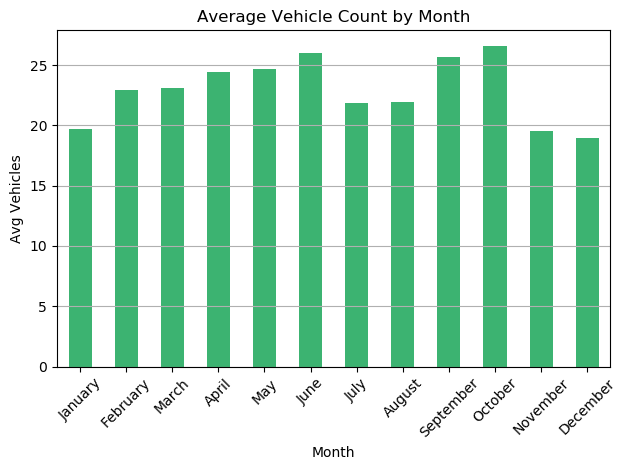

In [13]:
#4.Are there any seasonal trends (e.g., more traffic in certain months)?

# Extract month name and number
dataset['Month'] = dataset['DateTime'].dt.month
dataset['MonthName'] = dataset['DateTime'].dt.month_name()

# Compute average vehicle count by month
monthly_avg = dataset.groupby('MonthName')['Vehicles'].mean()

# Reorder months properly (not alphabetical)
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_avg = monthly_avg.reindex(month_order)

# Print result
print("📆 Average vehicle count by month:")
print(monthly_avg)

# Plot result
monthly_avg.plot(kind='bar', color='mediumseagreen', title='Average Vehicle Count by Month')
plt.xlabel('Month')
plt.ylabel('Avg Vehicles')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


📈 Average vehicle count per year:
Year
2015    11.510018
2016    21.386916
2017    27.772733
Name: Vehicles, dtype: float64


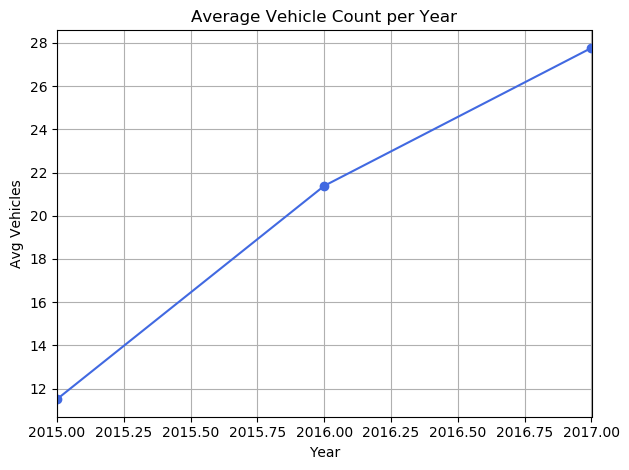

In [14]:
#5.Does the vehicle count change over the years (2015 to 2017)? Is traffic increasing or decreasing?

# Convert DateTime to datetime format
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'], errors='coerce')

# Extract year
dataset['Year'] = dataset['DateTime'].dt.year

# Calculate average vehicles per year
yearly_avg = dataset.groupby('Year')['Vehicles'].mean()

# Print result
print("📈 Average vehicle count per year:")
print(yearly_avg)

# Plot the trend
yearly_avg.plot(marker='o', linestyle='-', color='royalblue', title='Average Vehicle Count per Year')
plt.xlabel('Year')
plt.ylabel('Avg Vehicles')
plt.grid(True)
plt.tight_layout()
plt.show()


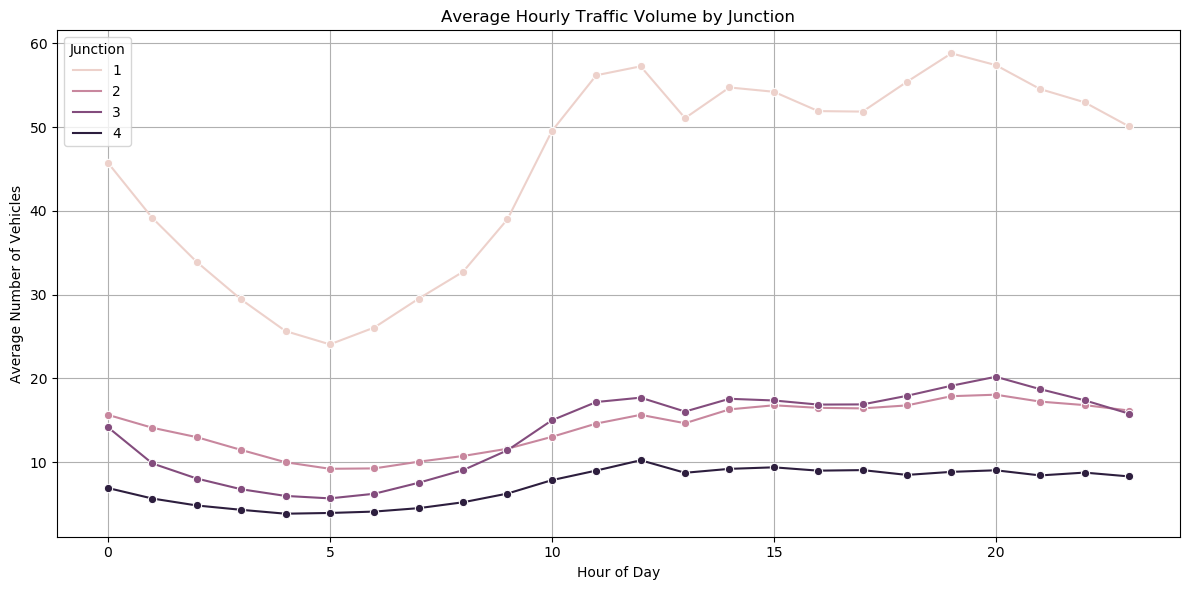

In [15]:
#6.Are there specific routes that frequently become bottlenecks? 

import seaborn as sns
# Parse DateTime column
dataset['DateTime'] = pd.to_datetime(dataset['DateTime'])

# Extract time-based features
dataset['Hour'] = dataset['DateTime'].dt.hour
dataset['DayOfWeek'] = dataset['DateTime'].dt.day_name()

# Aggregate average vehicles per junction by hour
avg_vehicles_by_junction = dataset.groupby(['Junction', 'Hour'])['Vehicles'].mean().reset_index()

# Plot traffic trends to find bottlenecks
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_vehicles_by_junction, x='Hour', y='Vehicles', hue='Junction', marker='o')
plt.title('Average Hourly Traffic Volume by Junction')
plt.ylabel('Average Number of Vehicles')
plt.xlabel('Hour of Day')
plt.grid(True)
plt.legend(title='Junction')
plt.tight_layout()
plt.show()


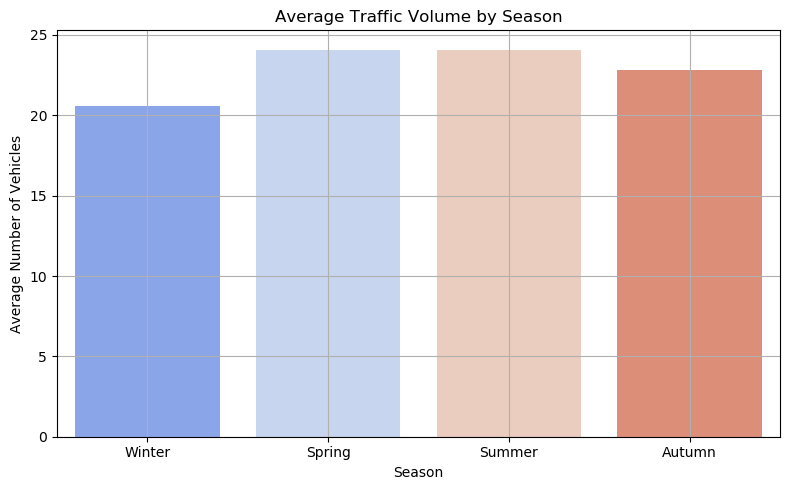

In [16]:
#7.Are there seasonal patterns in traffic flow (e.g., summer vs. winter)?import pandas as pd


# Extract month and year
dataset['Month'] = dataset['DateTime'].dt.month
dataset['Year'] = dataset['DateTime'].dt.year

# Optional: map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

dataset['Season'] = dataset['Month'].apply(get_season)

# Group by Season and calculate average vehicles
seasonal_avg = dataset.groupby('Season')['Vehicles'].mean().reset_index()

# Sort for consistent seasonal order
season_order = ['Winter', 'Spring', 'Summer', 'Autumn']
seasonal_avg['Season'] = pd.Categorical(seasonal_avg['Season'], categories=season_order, ordered=True)
seasonal_avg = seasonal_avg.sort_values('Season')

# Plot seasonal patterns
plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_avg, x='Season', y='Vehicles', palette='coolwarm')
plt.title('Average Traffic Volume by Season')
plt.ylabel('Average Number of Vehicles')
plt.xlabel('Season')
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
#8.What is the distribution of vehicle counts (mean, median, min, max)?

vehicle_stats = dataset['Vehicles'].describe()

print("📊 Vehicle Count Distribution Statistics:")
print(vehicle_stats)

print(f"Median: {dataset['Vehicles'].median()}")
print(f"Mode: {dataset['Vehicles'].mode()[0]}")


📊 Vehicle Count Distribution Statistics:
count    48120.000000
mean        22.791334
std         20.750063
min          1.000000
25%          9.000000
50%         15.000000
75%         29.000000
max        180.000000
Name: Vehicles, dtype: float64
Median: 15.0
Mode: 8


In [18]:
#9.How many extreme traffic events (very high/low vehicle count) occur in the dataset?


# Calculate IQR (Interquartile Range)
Q1 = dataset['Vehicles'].quantile(0.25)
Q3 = dataset['Vehicles'].quantile(0.75)
IQR = Q3 - Q1

# Define thresholds for low and high extremes
low_threshold = Q1 - 1.5 * IQR
high_threshold = Q3 + 1.5 * IQR

# Filter extreme low and high traffic events
extreme_low = dataset[dataset['Vehicles'] < low_threshold]
extreme_high = dataset[dataset['Vehicles'] > high_threshold]

# Count of extreme events
print("🔍 Extreme Traffic Event Summary:")
print(f"Low traffic events (Vehicles < {low_threshold:.2f}): {len(extreme_low)}")
print(f"High traffic events (Vehicles > {high_threshold:.2f}): {len(extreme_high)}")
print(f"Total extreme traffic events: {len(extreme_low) + len(extreme_high)}")


🔍 Extreme Traffic Event Summary:
Low traffic events (Vehicles < -21.00): 0
High traffic events (Vehicles > 59.00): 3617
Total extreme traffic events: 3617


In [19]:
#10.Which junction has the highest average vehicle count?

# Calculate average vehicle count per junction
junction_avg = dataset.groupby('Junction')['Vehicles'].mean().reset_index()

# Sort in descending order to find the highest average
junction_avg_sorted = junction_avg.sort_values(by='Vehicles', ascending=False)

# Display the junction with the highest average
top_junction = junction_avg_sorted.iloc[0]

print("🚦 Junction with the Highest Average Vehicle Count:")
print(f"Junction: {int(top_junction['Junction'])}")
print(f"Average Vehicles: {top_junction['Vehicles']:.2f}")


🚦 Junction with the Highest Average Vehicle Count:
Junction: 1
Average Vehicles: 45.05
